In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot, dates
from datetime import datetime
import warnings
warnings. filterwarnings('ignore')
from pandas.plotting import table
from datetime import datetime
from datetime import date
import calendar

In [10]:
project = pd.read_csv('showwcase_sessions.csv')
project.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [11]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.


# Dropping bottom two rows with null values for all columns 

In [12]:
project.dropna(axis=0, how='all', inplace=True)

# Replacing the null value in sessions_likes_given column with 0

In [13]:
project['session_likes_given'] = project['session_likes_given'].fillna(0)
project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     300 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 35.

In [15]:
project.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.423333,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.478234,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


From the above we can see that the 

mean of projects added are nearly 2 and maximum of 9
mean of likes given are nearly 10 and maximum of 27
mean of comments given are nearly 2 and maximum of 21
mean of inactive duration is nearly 733 and maximum of 2480
mean of bugs during the session is nearly 1 and maximum of 5
mean of session duration is nearly 1187 and maximum of 2395

            

# Converting date from String format to Category

In [17]:
project['login_date']= project.login_date.astype('category');
project.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   session_id              300 non-null    float64 
 1   customer_id             300 non-null    float64 
 2   login_date              300 non-null    category
 3   projects_added          300 non-null    object  
 4   likes_given             300 non-null    object  
 5   comment_given           300 non-null    object  
 6   inactive_status         300 non-null    object  
 7   bug_occured             300 non-null    object  
 8   session_projects_added  300 non-null    float64 
 9   session_likes_given     300 non-null    float64 
 10  session_comments_given  300 non-null    float64 
 11  inactive_duration       300 non-null    float64 
 12  bugs_in_session         300 non-null    float64 
 13  session_duration        300 non-null    float64 
dtypes: category(1), float64(8)

# Finding total session users and unique session users

In [19]:
total_session_users = project['customer_id'].count()
unique_session_users = project['customer_id'].nunique()
print(total_session_users)
print(unique_session_users)

300
48


There are total 300 users and 48 unique users

# Boxplot comparison of session_duration AND inactive_duration

[Text(0, 0, 'session_duration'), Text(0, 0, 'inactive_duration')]

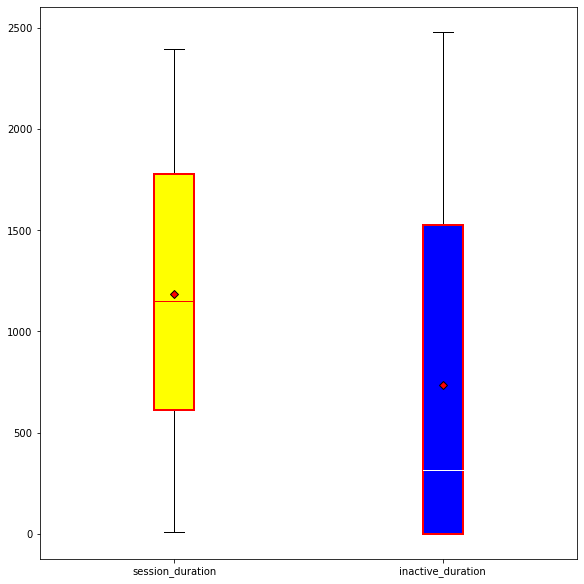

In [20]:
f,ax=plt.subplots(1,1,constrained_layout=True)
f.set_size_inches(8,8)

meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='red')


data_newD=project[['session_duration','inactive_duration']]
data_newD.columns=['session_duration','inactive_duration']

list=[data_newD['session_duration'],data_newD['inactive_duration']]
bp=ax.boxplot(list,patch_artist=True,showmeans=True,meanprops=meanpointprops,showfliers = False)

for i in range(len(bp['boxes'])):
    if i==0: 
        bp['boxes'][i].set(color='red',linewidth=2)
        bp['boxes'][i].set(facecolor='yellow')
        
    elif i==1:
          bp['boxes'][i].set(color='red',linewidth=2)
          bp['boxes'][i].set(facecolor='blue')
        
for j in range(len(bp['medians'])):
    if j==0:
         bp['medians'][j].set(color='red')  
    elif j==1:
         bp['medians'][j].set(color='white')

ax.set_xticklabels(['session_duration','inactive_duration'])

# Daily session_duration

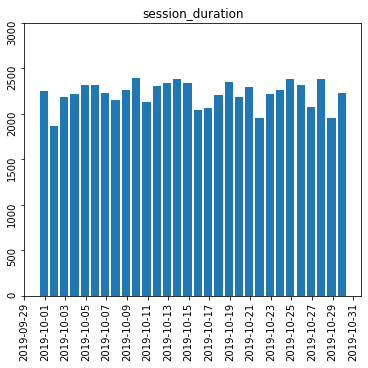

In [37]:
F,ax1=plt.subplots(1,1,figsize=(5,5),constrained_layout=True,sharey=True)

b1=ax1.bar(data=project,x='login_date',height='session_duration')
ax1.set_title('session_duration')
ax1.set_ylim([0,3000])

start,end= ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end,2))
ax1.tick_params(labelrotation=90)


From the above,the session_duration there is no much variation for all the days in the month of october

# Daily inactive_duration

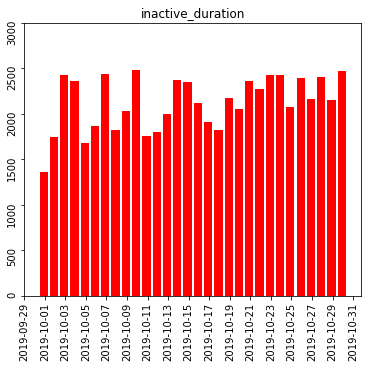

In [42]:
F,ax1=plt.subplots(1,1,figsize=(5,5),constrained_layout=True,sharey=True)

b1=ax1.bar(data=project,x='login_date',height='inactive_duration',color= 'red')
ax1.set_title('inactive_duration')
ax1.set_ylim([0,3000])

start,end= ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end,2))
ax1.tick_params(labelrotation=90)

we can see that there is lesser inactive duration at the begining. But there is no particular pattren followed it has peaks some days and troughs some days

# converting login_date from string to datetime to extract day of week

In [54]:
project['login_date'] = pd.to_datetime(project['login_date'])
project['day_of_week'] = project['login_date'].dt.dayofweek

# user activity by day of week

Text(0, 0.5, 'Average Count')

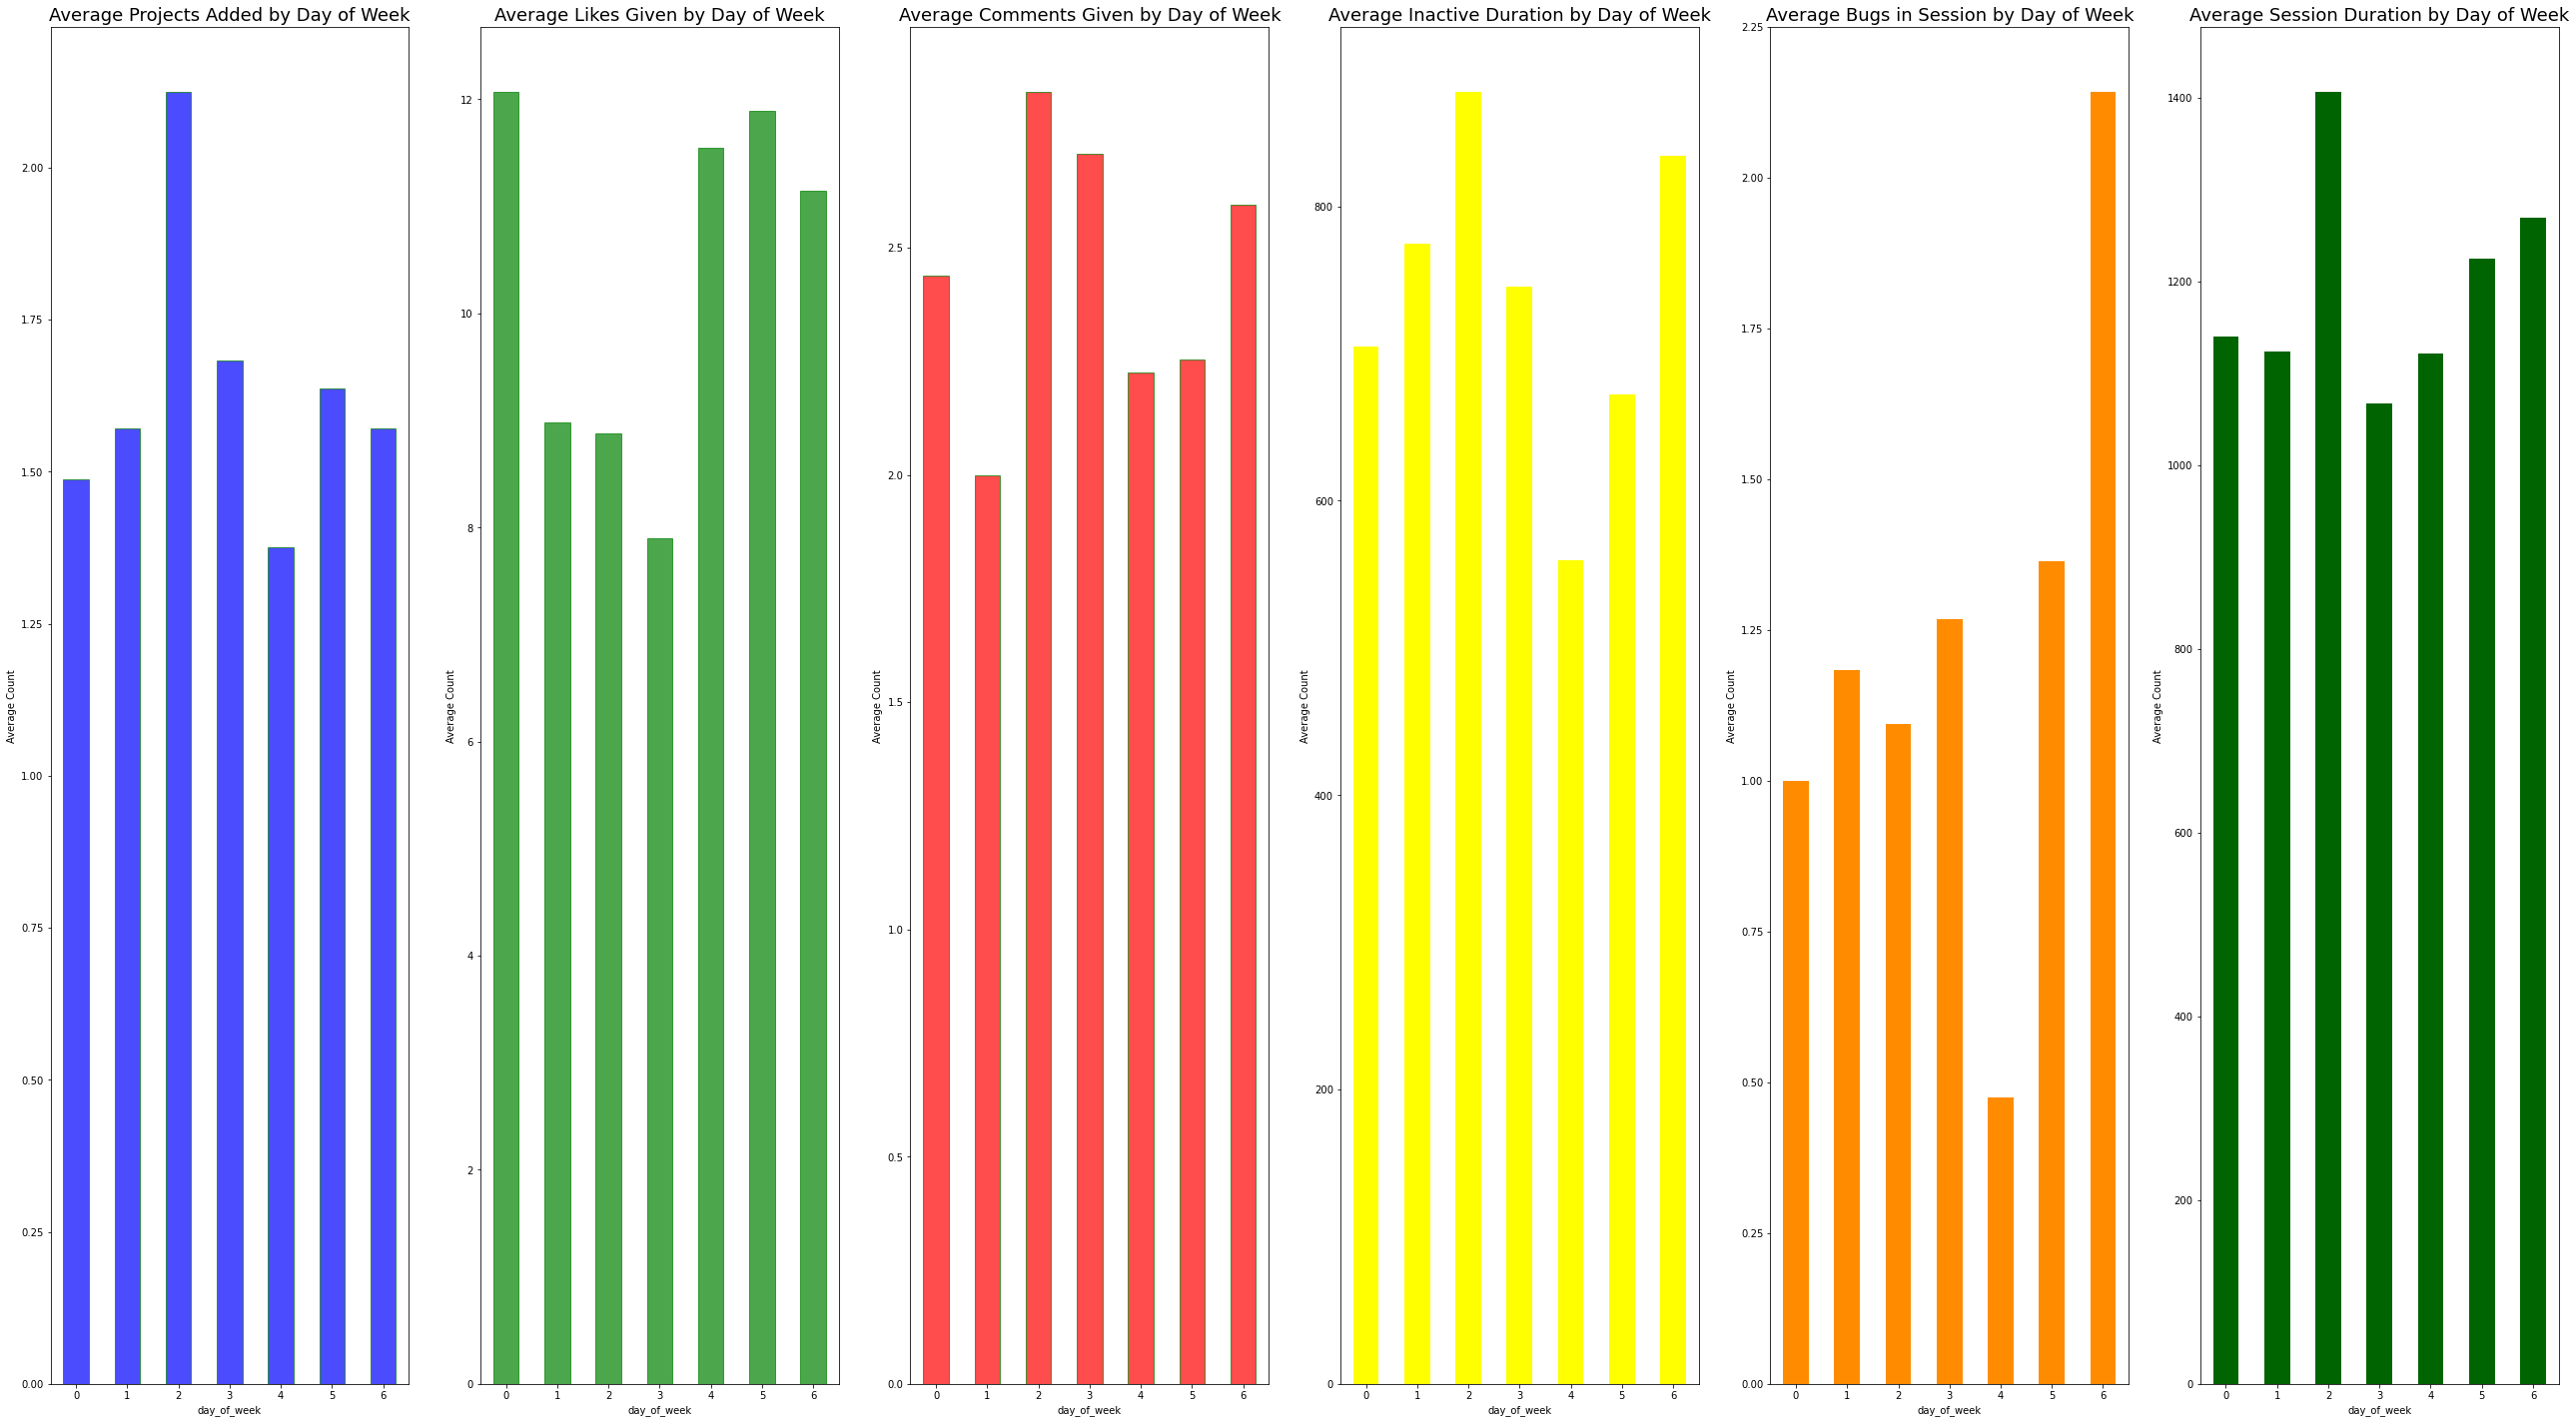

In [78]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize =(45,25))

project.groupby('day_of_week').session_projects_added.mean().plot(kind='bar', color='blue', alpha=0.7, edgecolor='g', ax=ax1, rot=0)
ax1.set_title('Average Projects Added by Day of Week', fontsize=18)
ax1.set_ylabel("Average Count")

project.groupby('day_of_week').session_likes_given.mean().plot(kind='bar', color='green', alpha=0.7, edgecolor='g',ax=ax2, rot=0)
ax2.set_title('Average Likes Given by Day of Week', fontsize=18)
ax2.set_ylabel("Average Count")

project.groupby('day_of_week').session_comments_given.mean().plot(kind='bar', color='red', alpha=0.7, edgecolor='g', ax=ax3, rot=0)
ax3.set_title('Average Comments Given by Day of Week', fontsize=18)
ax3.set_ylabel("Average Count")

project.groupby('day_of_week').inactive_duration.mean().plot(kind='bar', color='yellow', ax=ax4, rot=0)
ax4.set_title('Average Inactive Duration by Day of Week', fontsize=18)
ax4.set_ylabel("Average Count")

project.groupby('day_of_week').bugs_in_session.mean().plot(kind='bar', color='darkorange', ax=ax5, rot=0)
ax5.set_title('Average Bugs in Session by Day of Week', fontsize=18)
ax5.set_ylabel("Average Count")

project.groupby('day_of_week').session_duration.mean().plot(kind='bar', color='darkgreen', ax=ax6, rot=0)
ax6.set_title('Average Session Duration by Day of Week', fontsize=18)
ax6.set_ylabel("Average Count")

On Tuesday, more projects were added on average as we can also see on tuesdays the average session duration is also high

On saturdays, the average bugs are high which also resulted in high inactive duration on saturday, so it is recommended to improve support during weekends.

It can be seen that on tuesdays, there is high average session duration and average inactive duration. So in order to reduce that inactivity it is recommended to develop the recommendation system based on user history to attract users to increase user engagement 


# Average Inactive duration by customer

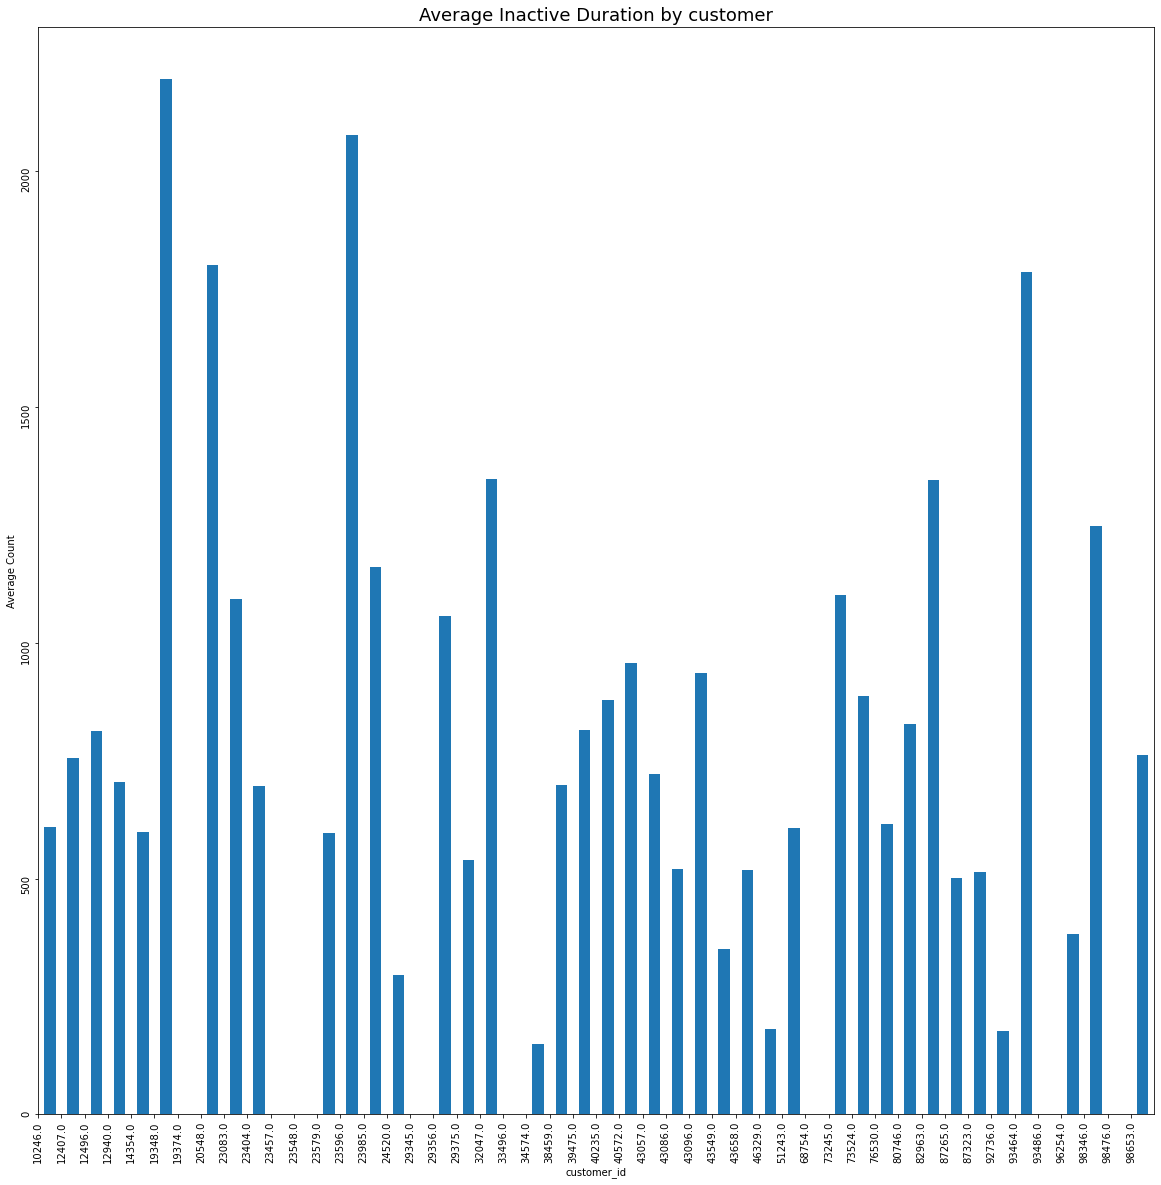

In [77]:
fig, (ax1) = plt.subplots(1,1, figsize =(20,20))

project.groupby('customer_id').inactive_duration.mean().plot(kind='bar', ax=ax1, rot=0)
ax1.set_title('Average Inactive Duration by customer', fontsize=18)
ax1.set_ylabel("Average Count")

start,end= ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end))
ax1.tick_params(labelrotation=90)

Taking the collective feedback from the customers with high inactivity duration and giving some personalised recommendations may improve user engagement

# Finding out the active and inactive customers

In [86]:
project['customer_id'].value_counts()

29375.0    22
23404.0    21
38459.0    18
40235.0    17
87323.0    17
40572.0    16
73245.0    15
14354.0    15
87265.0    12
51243.0    12
23083.0    11
73524.0     8
12407.0     8
23985.0     8
43549.0     7
34574.0     7
96254.0     7
43057.0     6
29356.0     6
98653.0     6
12496.0     6
12940.0     5
43086.0     5
23579.0     5
32047.0     4
80746.0     4
10246.0     4
93464.0     4
39475.0     4
24520.0     2
23457.0     1
68754.0     1
76530.0     1
92736.0     1
19374.0     1
29345.0     1
43096.0     1
46329.0     1
82963.0     1
43658.0     1
20548.0     1
19348.0     1
23548.0     1
93486.0     1
23596.0     1
33496.0     1
98476.0     1
98346.0     1
Name: customer_id, dtype: int64

By giving the returning customers some benefits like discounts in subscriptions and premium plans, customer loyalty would be increased.